# Gradient Descent - 2 Dimension

This provides an example of using gradient descent with bi-variate data and graphing in three dimensions.

The cost function to minimise is:
$$ f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1} $$
or,
$$ f(x,y) = \frac{1}{r + 1} $$
where $r$ is $3^{-x^2 - y^2}$.

## Imports and Packages

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create cost function as Python function:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

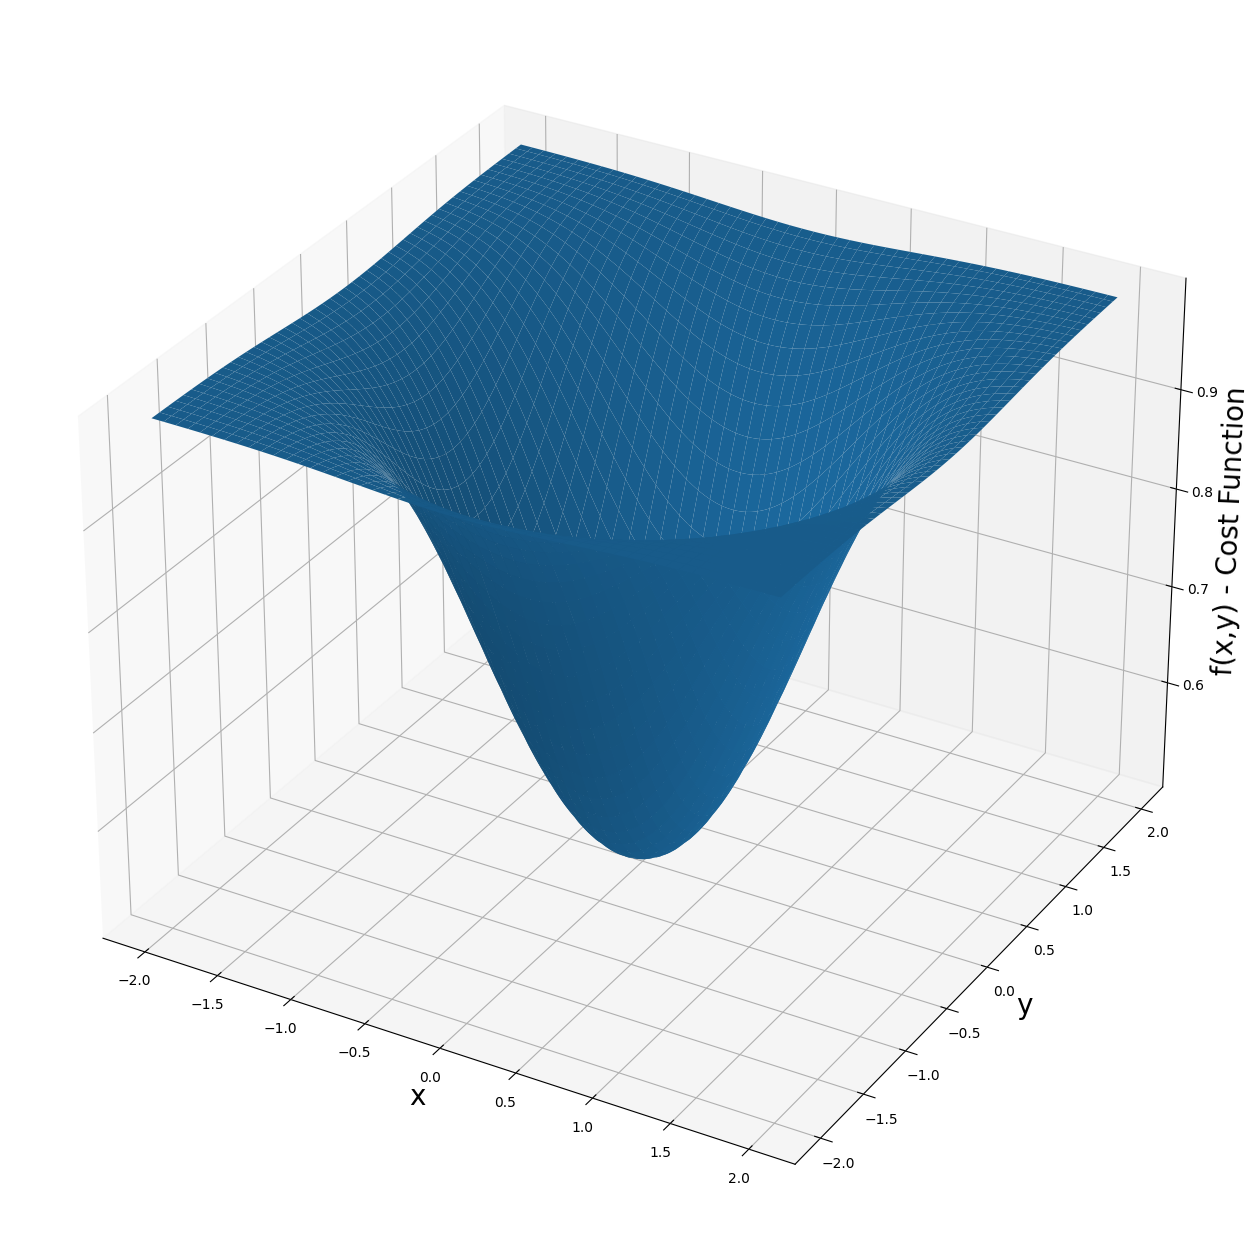

In [18]:
# Create x and y data.
xData = np.linspace(start=-2, stop=2, num=200)
yData = np.linspace(start=-2, stop=2, num=200)
# To plot the surface, these need to be 2-dimensional arrays - use numpy meshgrid() function to make 2D array.
xData, yData = np.meshgrid(xData, yData)

# Generate 3D plot
threeDFigure = plt.figure(figsize=[16,16])
axes = plt.subplot(projection='3d')
# ax = threeDFigure.add_subplot(projection='3d')

axes.set_xlabel('x', fontsize=20)
axes.set_ylabel('y', fontsize=20)
axes.set_zlabel('f(x,y) - Cost Function', fontsize=20)
axes.plot_surface(xData, yData, f(xData, yData))